In [60]:
import numpy as np
import matplotlib.pyplot as plt
import keras 

from keras.datasets import mnist

### IMPORT DATA

In [61]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()


In [62]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [63]:
def plot_input_image(i):
    plt.imshow(X_train[i] , cmap='binary')
    plt.title(y_train[i])
    plt.show()

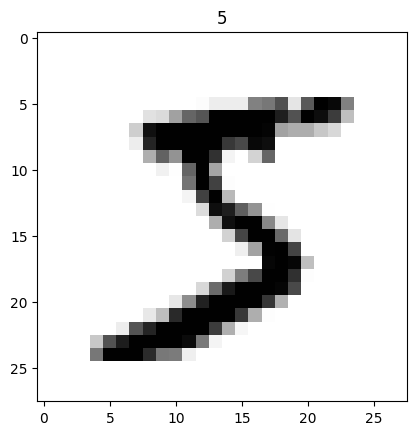

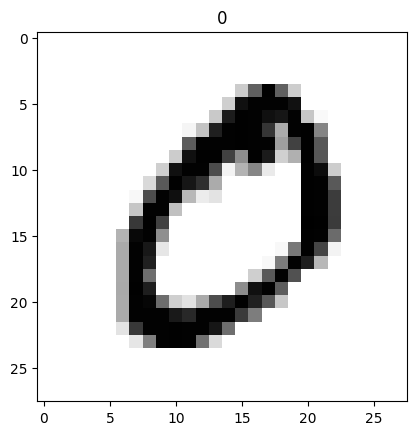

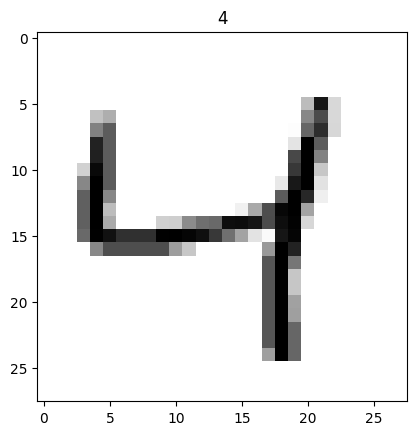

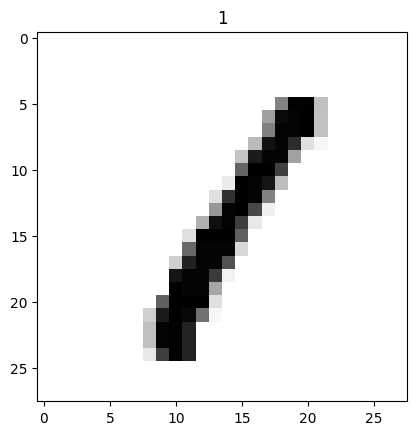

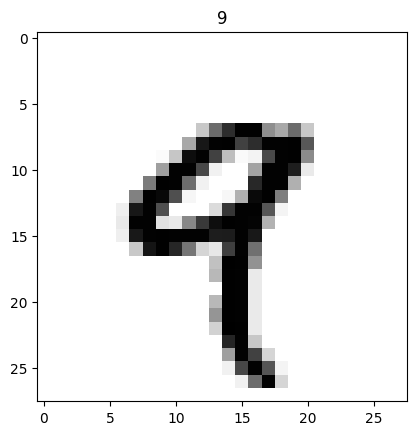

In [64]:
for i in range(5):
    plot_input_image(i)
    

### PREPROCESSING

In [65]:
#normalize the image to [0,1] range

X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshaping 
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [66]:
X_train.shape

(60000, 28, 28, 1)

In [67]:
#convert classes to one hot vector
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


In [68]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [69]:
model=Sequential()
model.add(Conv2D(32 ,(3,3),input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64 ,(3,3),activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [71]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [72]:
#callbacks

from keras.callbacks import EarlyStopping,ModelCheckpoint

#Earlystopping
es = EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

#Model chickpoint
mc=ModelCheckpoint('./bestmodel.h5',monitor='val_acc',verbose=1,save_best_only=True)

cb=[es,mc]

In [ ]:
model.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.5580 - accuracy: 0.9131 - val_loss: 0.1038 - val_accuracy: 0.9711
Epoch 2/10
1313/1313 [==============================] - 35s 26ms/step - loss: 0.1113 - accuracy: 0.9672 - val_loss: 0.0793 - val_accuracy: 0.9763
Epoch 3/10
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0875 - accuracy: 0.9744 - val_loss: 0.0667 - val_accuracy: 0.9798
Epoch 4/10
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.0716 - val_accuracy: 0.9790
Epoch 5/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0674 - accuracy: 0.9797 - val_loss: 0.0742 - val_accuracy: 0.9787
Epoch 6/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0669 - val_accuracy: 0.9829
Epoch 7/10
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.0536 -

In [78]:
score = model.evaluate(X_test, y_test)
print(f"Test accuracy:{score[1]}")

313/313 [==============================] - 2s 5ms/step - loss: 2.3609 - accuracy: 0.1135
Test accuracy:0.11349999904632568
